# Veriyi Yükleme

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir=r"C:Tensorflow\f1"

train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="training",batch_size=2)

test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="validation",batch_size=2)

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


# Görselleştirme

(2, 500, 500, 3)
[0. 0. 0. 1.]


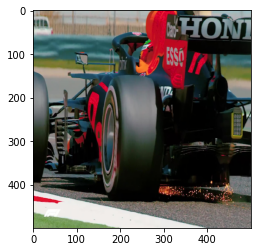

(2, 500, 500, 3)
[1. 0. 0. 0.]


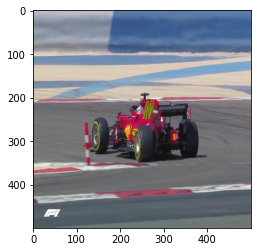

(2, 500, 500, 3)
[1. 0. 0. 0.]


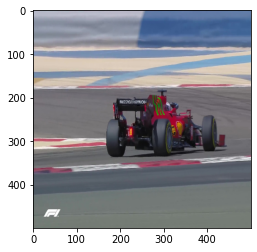

(2, 500, 500, 3)
[0. 0. 1. 0.]


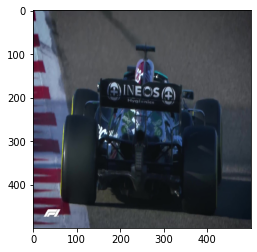

(2, 500, 500, 3)
[0. 1. 0. 0.]


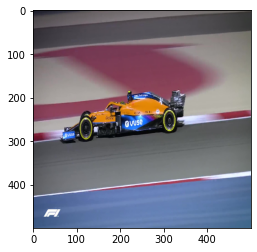

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

for _ in range(5):
    img, label = test_datagen.next()
    print(img.shape)   
    plt.imshow(img[0])
    print(label[0])   

    plt.show()

# Kütüphaneler

In [26]:
import tensorflow as tf
import numpy as np
import pylab as pl
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers,activations

# Model Oluşumu

In [27]:
model=Sequential()

model.add(layers.Conv2D(filters=4,activation="elu",kernel_size=(5,5),input_shape=(500,500,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=8,activation="elu",kernel_size=(3,3),name="layer"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=16,activation="elu",kernel_size=(2,2)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=32,activation="elu",kernel_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(4,activation="softmax"))

In [28]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 496, 496, 4)       304       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 248, 248, 4)       0         
_________________________________________________________________
layer (Conv2D)               (None, 246, 246, 8)       296       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 123, 123, 8)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 122, 122, 16)      528       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 60, 60, 32)       

# Model Eğitimi

In [8]:
optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001)
loss=tf.keras.losses.CategoricalCrossentropy()

In [9]:
model.compile(optimizer=optimizer,loss=loss,metrics=["mse","accuracy"])

In [10]:
result=model.fit(train_datagen,epochs=5,verbose=1,validation_data=test_datagen)

Epoch 1/5
126/126 [==============================] - 11s 80ms/step - loss: 1.6282 - mse: 0.1846 - accuracy: 0.4167 - val_loss: 1.6022 - val_mse: 0.2069 - val_accuracy: 0.4643
Epoch 2/5
126/126 [==============================] - 10s 80ms/step - loss: 0.6985 - mse: 0.0977 - accuracy: 0.7103 - val_loss: 1.4493 - val_mse: 0.1936 - val_accuracy: 0.3929
Epoch 3/5
126/126 [==============================] - 11s 85ms/step - loss: 0.3736 - mse: 0.0506 - accuracy: 0.8690 - val_loss: 1.6242 - val_mse: 0.2032 - val_accuracy: 0.3929
Epoch 4/5
126/126 [==============================] - 12s 91ms/step - loss: 0.1919 - mse: 0.0263 - accuracy: 0.9325 - val_loss: 1.3610 - val_mse: 0.1565 - val_accuracy: 0.5714
Epoch 5/5
126/126 [==============================] - 11s 90ms/step - loss: 0.0364 - mse: 0.0022 - accuracy: 1.0000 - val_loss: 1.4094 - val_mse: 0.1615 - val_accuracy: 0.5714


In [29]:
result.history

{'loss': [1.6282305717468262,
  0.6984843611717224,
  0.3736054599285126,
  0.19188657402992249,
  0.036392923444509506],
 'mse': [0.1846015453338623,
  0.09769510477781296,
  0.05063699558377266,
  0.026300450786948204,
  0.002216424560174346],
 'accuracy': [0.4166666567325592,
  0.7103174328804016,
  0.8690476417541504,
  0.932539701461792,
  1.0],
 'val_loss': [1.6022270917892456,
  1.449267029762268,
  1.6242072582244873,
  1.3610305786132812,
  1.409393310546875],
 'val_mse': [0.2069181352853775,
  0.1936139017343521,
  0.2032359391450882,
  0.15651026368141174,
  0.16147862374782562],
 'val_accuracy': [0.4642857015132904,
  0.3928571343421936,
  0.3928571343421936,
  0.5714285969734192,
  0.5714285969734192]}

# Model Testi

In [12]:
model.evaluate(test_datagen)

14/14 [==============================] - 1s 45ms/step - loss: 1.4094 - mse: 0.1615 - accuracy: 0.5714


[1.409393310546875, 0.16147862374782562, 0.5714285969734192]

### Test Veri Seti Üzerinden Test

mclaren


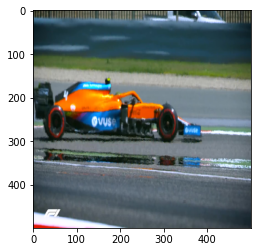

In [30]:
print(test_datagen.class_indices)
for _ in range(10):
    img,label =train_datagen.next()
    a=model.predict(img)
    np.argmax(a[0]) 
    plt.imshow(img[0])
    if np.argmax(a[0])==0:
        print("ferrari")
    if np.argmax(a[0])==1:
        print("mclaren")
    if np.argmax(a[0])==2:
        print("mercedes")
    if np.argmax(a[0])==3:
        print("redbull")
        
    plt.show()   

### Tek Resim Üzerinden Test

In [31]:
from PIL import Image
from skimage import transform
image=Image.open(r"formula.jpg")
def load(filename):
    
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (500,500, 3))
    np_image = np.expand_dims(np_image, axis=0)
    print(test_datagen.class_indices)
    return np_image

image = load('formula.jpg')
pred=model.predict(image)
print(pred)
np.argmax(pred)

FileNotFoundError: [Errno 2] No such file or directory: 'formula.jpg'

### Test

In [38]:
test_a=model.predict(test_datagen)

In [39]:
t=[]
print(test_datagen.class_indices) 
for i in test_a:
    t.append(np.argmax(i))
x=zip(t,test_datagen.labels)
for i,j in x:
    print("Tahmin:{} Gerçek: {}".format(i,j))   

{'ferrari': 0, 'mclaren': 1, 'mercedes': 2, 'redbull': 3}
Tahmin:0 Gerçek: 0
Tahmin:0 Gerçek: 0
Tahmin:1 Gerçek: 0
Tahmin:0 Gerçek: 0
Tahmin:1 Gerçek: 0
Tahmin:0 Gerçek: 0
Tahmin:2 Gerçek: 0
Tahmin:2 Gerçek: 1
Tahmin:2 Gerçek: 1
Tahmin:0 Gerçek: 1
Tahmin:0 Gerçek: 1
Tahmin:0 Gerçek: 1
Tahmin:2 Gerçek: 1
Tahmin:2 Gerçek: 1
Tahmin:2 Gerçek: 2
Tahmin:2 Gerçek: 2
Tahmin:2 Gerçek: 2
Tahmin:2 Gerçek: 2
Tahmin:2 Gerçek: 2
Tahmin:1 Gerçek: 2
Tahmin:2 Gerçek: 2
Tahmin:2 Gerçek: 3
Tahmin:2 Gerçek: 3
Tahmin:1 Gerçek: 3
Tahmin:2 Gerçek: 3
Tahmin:1 Gerçek: 3
Tahmin:2 Gerçek: 3
Tahmin:1 Gerçek: 3


# Görselleştirme

In [40]:
result.history

{'loss': [1.6282305717468262,
  0.6984843611717224,
  0.3736054599285126,
  0.19188657402992249,
  0.036392923444509506],
 'mse': [0.1846015453338623,
  0.09769510477781296,
  0.05063699558377266,
  0.026300450786948204,
  0.002216424560174346],
 'accuracy': [0.4166666567325592,
  0.7103174328804016,
  0.8690476417541504,
  0.932539701461792,
  1.0],
 'val_loss': [1.6022270917892456,
  1.449267029762268,
  1.6242072582244873,
  1.3610305786132812,
  1.409393310546875],
 'val_mse': [0.2069181352853775,
  0.1936139017343521,
  0.2032359391450882,
  0.15651026368141174,
  0.16147862374782562],
 'val_accuracy': [0.4642857015132904,
  0.3928571343421936,
  0.3928571343421936,
  0.5714285969734192,
  0.5714285969734192]}

In [41]:
acc=result.history["accuracy"]
val_acc=result.history["val_accuracy"]
acc_loss=result.history["loss"]
val_loss=result.history["val_loss"]

In [42]:
epoch=range(1,len(acc)+1)

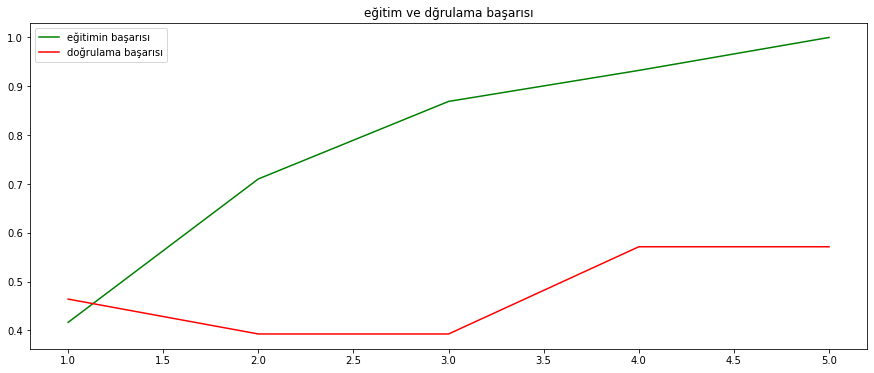

In [45]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc,label=("eğitimin başarısı"),color="g")
plt.plot(epoch,val_acc,label=("doğrulama başarısı"),color="r")
plt.title("eğitim ve dğrulama başarısı")
plt.legend()

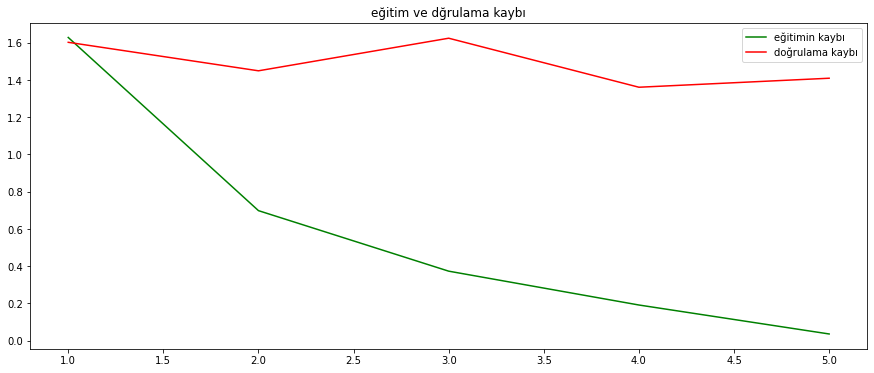

In [46]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc_loss,label=("eğitimin kaybı"),color="g")
plt.plot(epoch,val_loss,label=("doğrulama kaybı"),color="r")
plt.title("eğitim ve dğrulama kaybı")
plt.legend()

# Ara Katmanları Göstermek

In [ ]:
from skimage import transform
np_image = Image.open("McLaren03981.jpg")
np_image = np.array(np_image).astype('float32')/255
np_image = transform.resize(np_image, (500,500, 3))
image = np.expand_dims(np_image, axis=0)

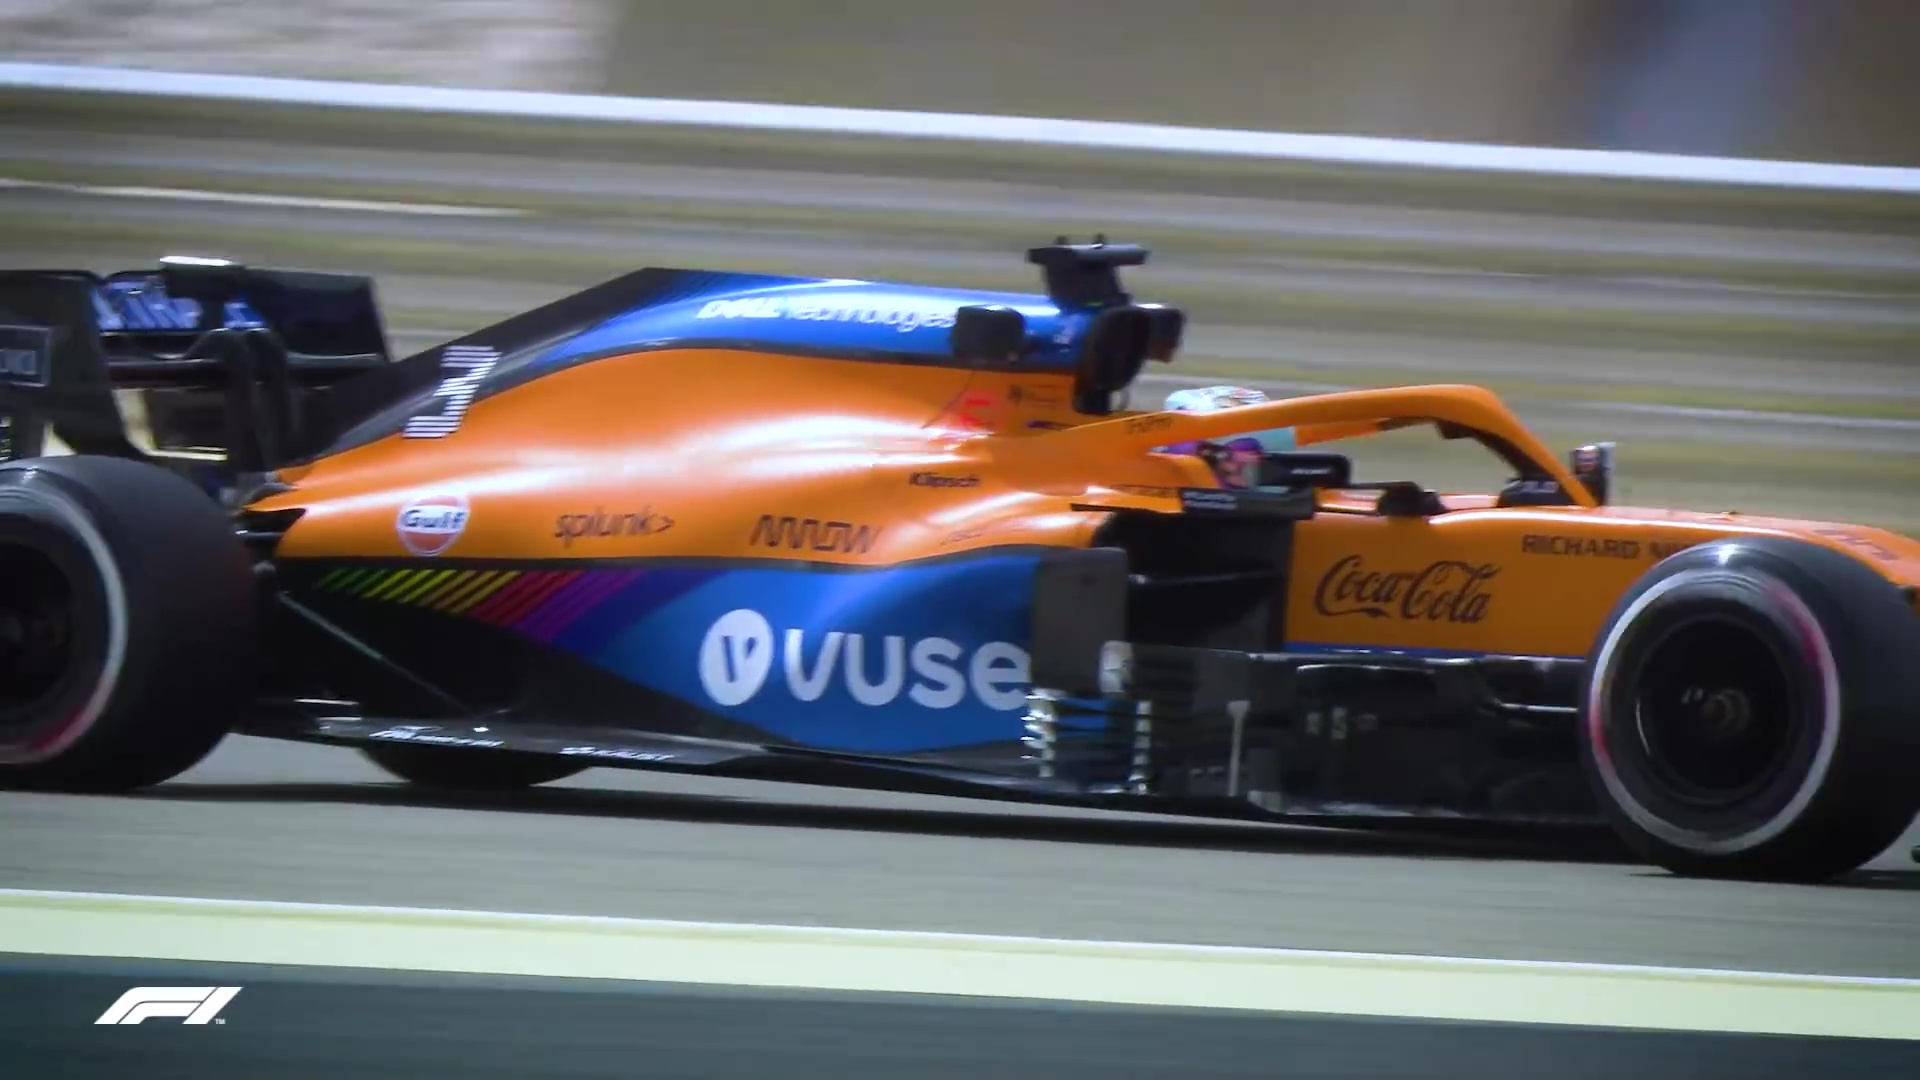

In [55]:
np_image = Image.open("McLaren03981.jpg")
np_image

In [95]:
from tensorflow.keras import models

layers=[layer.output for layer in model.layers[:8]]
katman=models.Model(inputs=model.input,outputs=layers)
katman=katman.predict(image)
first=katman[6]
print(first.shape)

(1, 60, 60, 32)


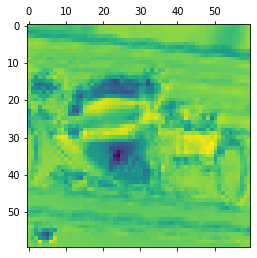

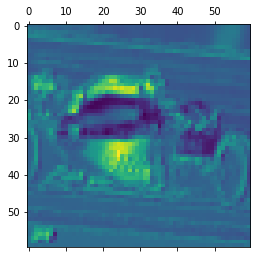

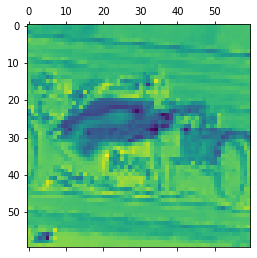

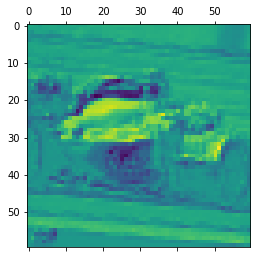

In [96]:
plt.matshow(first[0,:,:,0],cmap="viridis")
plt.matshow(first[0,:,:,1],cmap="viridis")
plt.matshow(first[0,:,:,2],cmap="viridis")
plt.matshow(first[0,:,:,3],cmap="viridis")